Import

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


In [2]:
warnings.filterwarnings('ignore')
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [3]:
df = pd.read_csv('Diamonds Prices2022.csv')

Preprocessing

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


In [6]:
df.count()

Unnamed: 0    53943
carat         53943
cut           53943
color         53943
clarity       53943
depth         53943
table         53943
price         53943
x             53943
y             53943
z             53943
dtype: int64

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.isnull().values.any()

False

## Diamond Dataset Features
* Carat: 1 carat  =200mg, weight of diamond
* Clarity: amount of presence of blemishes
* Cut: brilliance(brightness), fire(scattering of light), sparkling, depth%, table%

* Color: colorless(D,E,F), near colorless (G,H,I,J)
* Length, Width, Depth: x, y, z  

In [10]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [11]:
df.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Exploratory data analysis

In [13]:
print(df.cut.unique())
print(df.clarity.unique())
print(df.color.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [14]:
df.describe()

,carat,depth %,table %,price,length,width,depth
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
df[(df.length == 0) | (df.width == 0) | (df.depth==0)]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
df[['length','width','depth']] = df[['length','width','depth']].replace(0,np.NaN)

In [17]:
df.dropna(inplace = True)

In [18]:
df[(df.length == 0) | (df.width == 0) | (df.depth==0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth


In [19]:
print(df.isna().values.any())
df.shape

False


(53923, 10)

<Axes: >

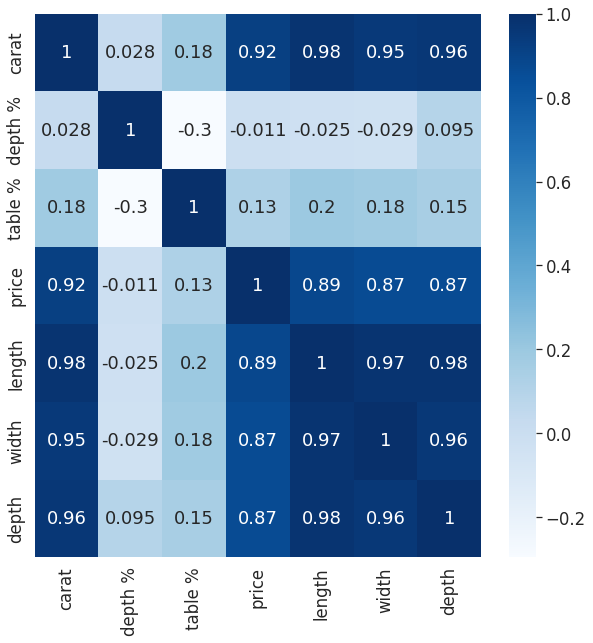

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap = 'Blues')

From the above plot, We can see that carat, length, width, depth, and price are having a high correlation with each other.

### Color vs Price

<Axes: xlabel='color', ylabel='price'>

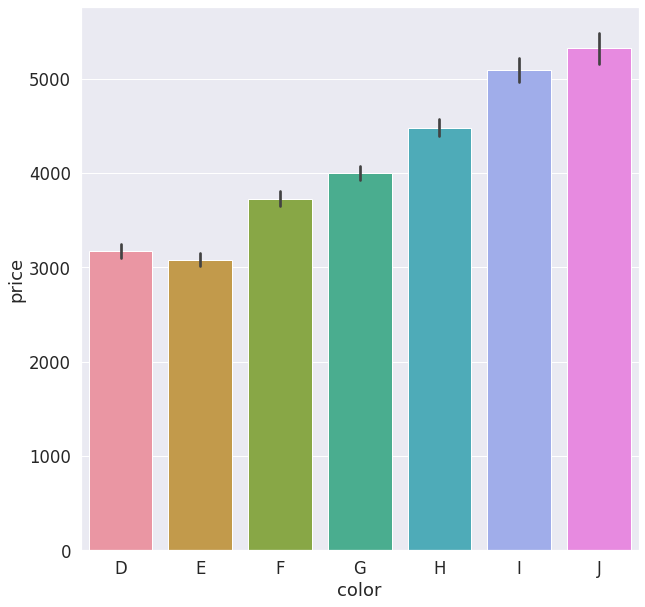

In [21]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'color', y = 'price', data = df, order = ['D','E','F','G','H','I','J'] )

<Axes: xlabel='color', ylabel='price'>

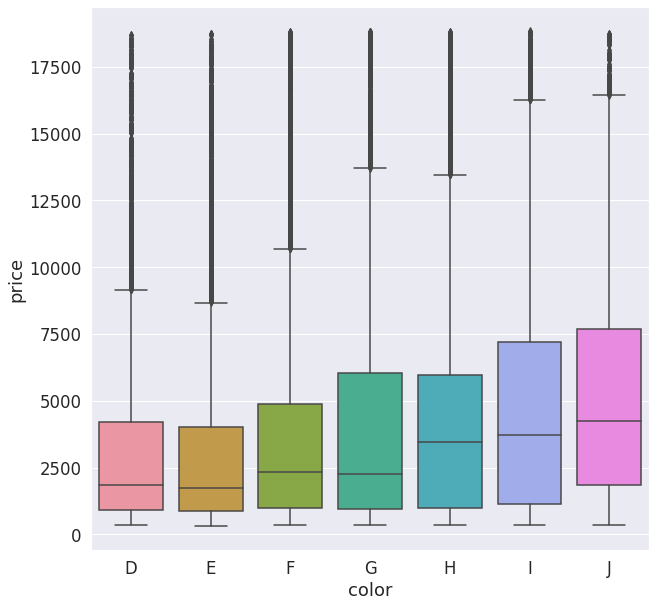

In [22]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'color', y = 'price', data = df, order = ['D','E','F','G','H','I','J'] )

From the above plot, we can see that G, H, I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color. Also, each category type has the same maximum and minimum price.

### Cut vs Price

<Axes: xlabel='cut', ylabel='price'>

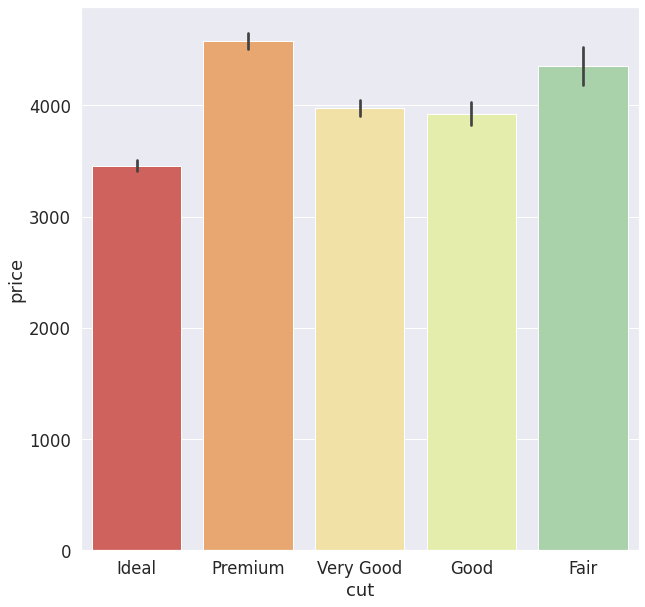

In [23]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'cut', y = 'price', data = df, order = ['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

<Axes: xlabel='cut', ylabel='price'>

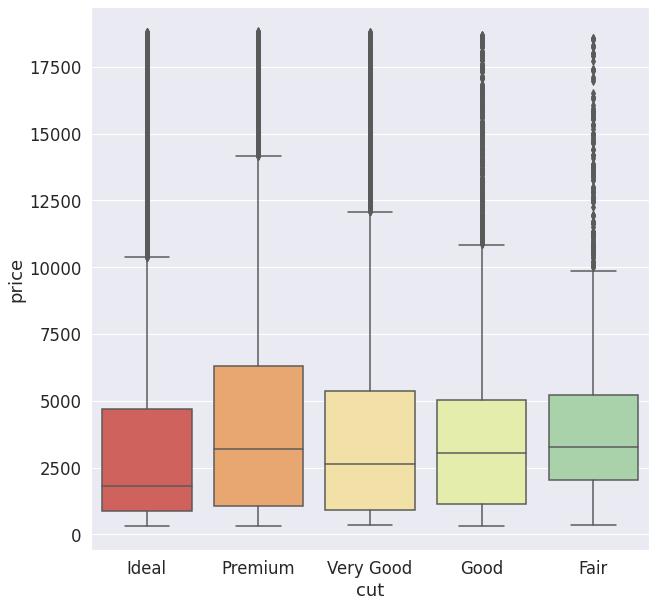

In [24]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'cut', y = 'price', data = df, order = ['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type.

### Clarity Vs Price

<Axes: xlabel='clarity', ylabel='price'>

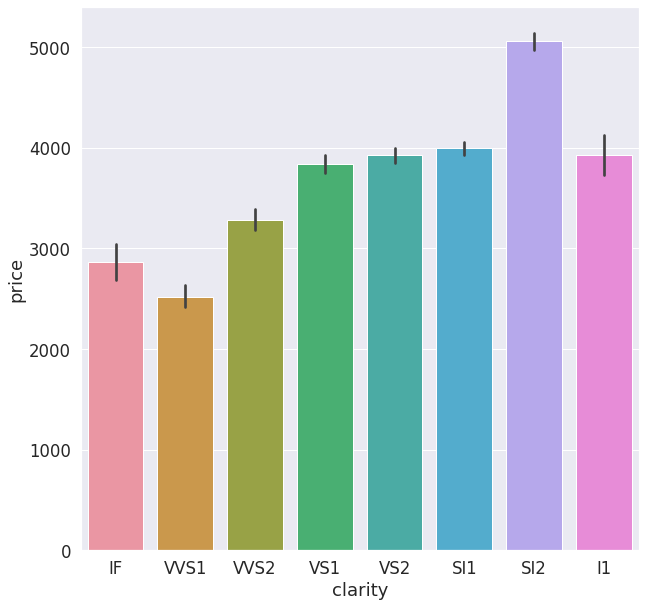

In [25]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'clarity', y = 'price', data = df, order = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'] )

<Axes: xlabel='clarity', ylabel='price'>

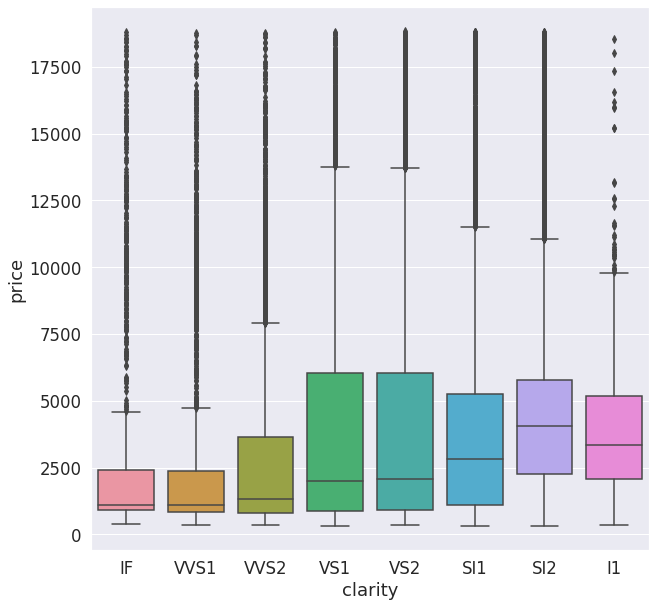

In [26]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'clarity', y = 'price', data = df, order = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'] )

From the above plot, we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

In [27]:
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])
cut_clarity_table

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,169,261,17,69
Good,95,71,1560,1078,648,978,186,286
Ideal,146,1212,4282,2597,3589,5069,2047,2606
Premium,203,230,3575,2944,1989,3356,615,870
Very Good,84,268,3240,2100,1775,2591,789,1235


<Axes: xlabel='cut'>

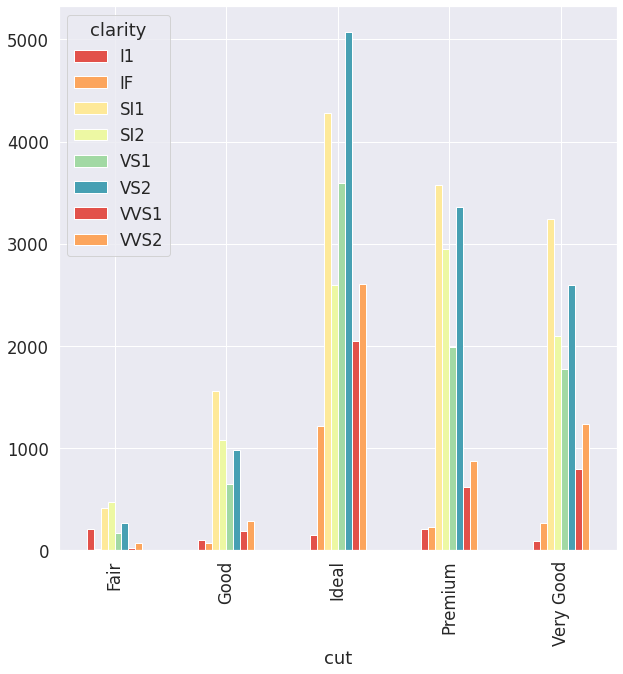

In [28]:

cut_clarity_table.plot(kind = 'bar',figsize = (10,10))

<Axes: xlabel='cut'>

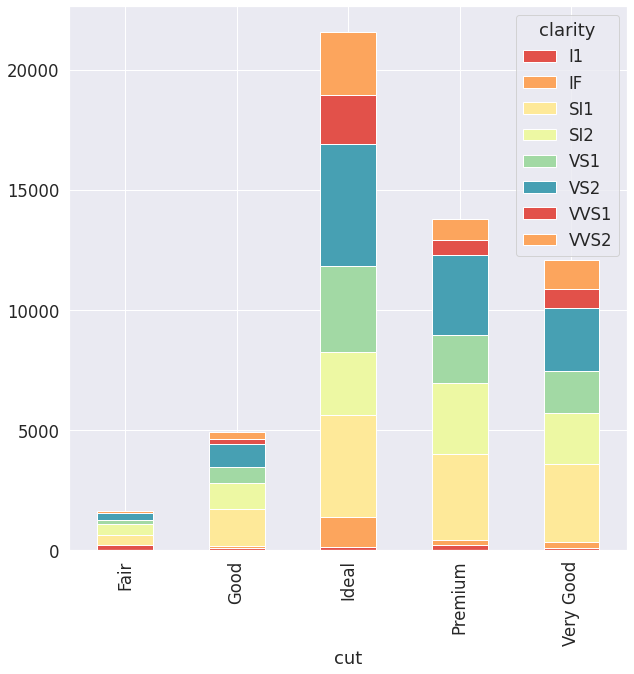

In [29]:
cut_clarity_table.plot(kind = 'bar',figsize = (10,10), stacked = True)

We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others. We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

In [30]:
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])
color_clarity_table

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,42,73,2083,1370,705,1697,251,553
E,102,158,2427,1713,1281,2471,656,991
F,143,385,2132,1605,1364,2201,734,975
G,148,681,1976,1545,2147,2345,999,1443
H,161,299,2274,1561,1169,1641,585,608
I,92,143,1423,912,962,1169,355,365
J,50,51,750,479,542,731,74,131


<Axes: xlabel='color'>

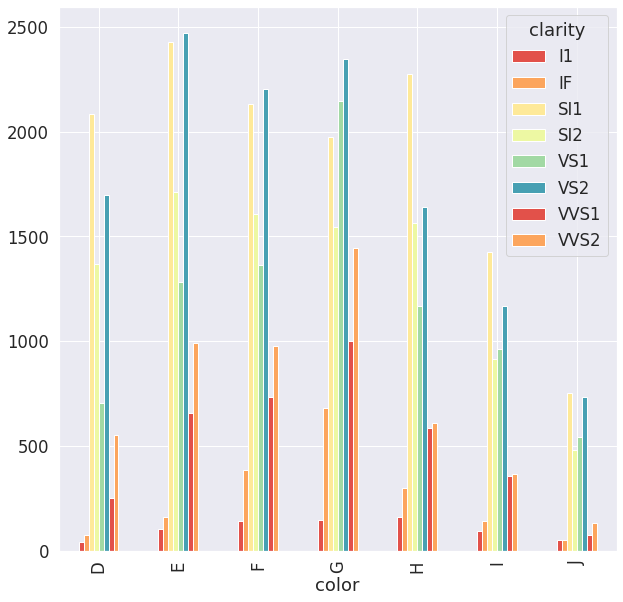

In [31]:
color_clarity_table.plot(kind = 'bar',figsize = (10,10))

<Axes: xlabel='color'>

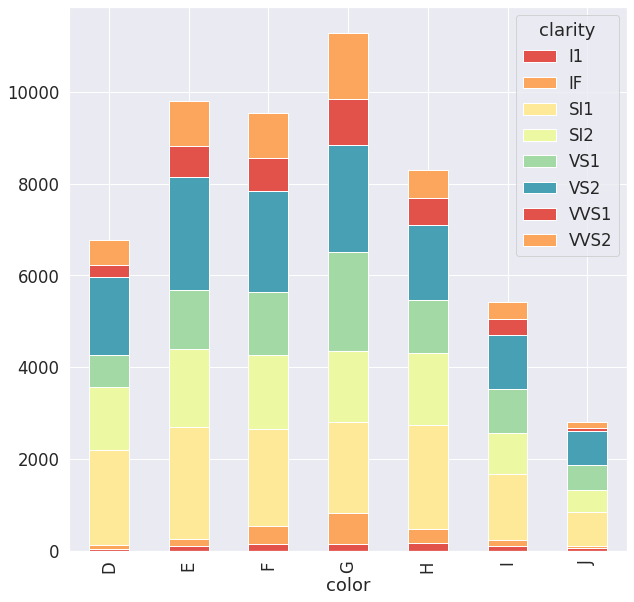

In [32]:
color_clarity_table.plot(kind = 'bar',figsize = (10,10), stacked = True)

We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.

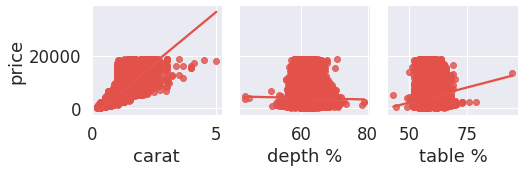

In [33]:
sns.pairplot(df , x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

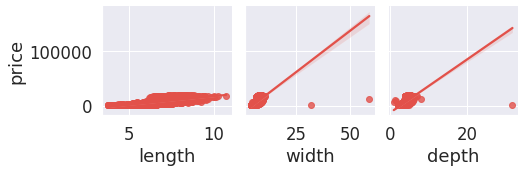

In [34]:
sns.pairplot(df , x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table % and depth % are showing linearity but with high outliers.

## Findings:

* Carat is the most prominent feature to determine price.
* Followed by length, witdth and depth

These have high positive correlation with price

* Categorical features like cut, color and clarity also play an important role in determining the price of diamond

* People are focusing on cut, then clarity and finally color. most prefered is ideal cut with SI1 clarity and  color G. 


# Machine Learning

some of the features have a considerable number of outliers. Therefore, We have to use regression-based machine learning algorithms to determine the price of a diamond based on some of the potential features such as polynomial, Linear regression algorithm to create our model.

In [35]:

df['clarity_score'] = df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
df['color_score'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['cut_score']  = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

In [36]:
df.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


In [57]:
x = df[['carat','cut_score','clarity_score','color_score','table %','depth %','length','width','depth']]

In [58]:
y = df['price']

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [60]:
y.skew()

1.6184296806450305

In [61]:
np.log(y).skew()

0.11544180753137365

In [63]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(x_train)

StandardScaler()

In [66]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [70]:
model = LinearRegression()

In [71]:
model.fit(x_train,y_train)

LinearRegression()

In [72]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [74]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test,y_test)

In [75]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [76]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [79]:
print(f'''
  Training Set:
  Score: {train_score: .2f}
  MSE : {mse_train: .2f}
  r2 : {r2_train: .2f}
''')


  Training Set:
  Score:  0.98
  MSE :  0.02
  r2 :  0.98



In [80]:
print(f'''
  Test Set:
  Score: {test_score: .2f}
  MSE : {mse_test: .2f}
  r2 : {r2_test: .2f}
''')


  Test Set:
  Score:  0.98
  MSE :  0.02
  r2 :  0.98



From the above output, we can see that ( R2
 ) value is 0.98 and MSE is 0.02. Based on the score, we can that this model prediction is accurate.

In [81]:
# Adjusted R2 score
n=x_test.shape[0]
p=x_test.shape[1]
adj_rsquared = 1 - (1 - r2_test) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Adjusted R Squared: 0.9778302886691765
